In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import skew
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pumpit-up/Test set.csv
/kaggle/input/pumpit-up/Train set.csv
/kaggle/input/final-test-vals/values (2).csv


This dataset is a part of the competition named "Pump It Up" hosted by DrivenData. In this we are given over 59400 rows of data, each row corresponding to a particular water pump in Tanzania. The aim of the competition is to predict the operationality of each water pump using the data given to us.

In [2]:
final_test_val=pd.read_csv('../input/final-test-vals/values (2).csv',index_col=0)

In [3]:
import numpy as np
from numpy import random
random.seed(12345)

VARIABLE DESCRIPTIONS:

amount_tsh - Total static head (amount water available to waterpoint)

date_recorded - The date the row was entered

funder - Who funded the well

gps_height - Altitude of the well

installer - Organization that installed the well

longitude - GPS coordinate

latitude - GPS coordinate

wpt_name - Name of the waterpoint if there is one

num_private -

basin - Geographic water basin

subvillage - Geographic location

region - Geographic location

region_code - Geographic location (coded)

district_code - Geographic location (coded)

lga - Geographic location

ward - Geographic location

population - Population around the well

public_meeting - True/False

recorded_by - Group entering this row of data

scheme_management - Who operates the waterpoint

scheme_name - Who operates the waterpoint

permit - If the waterpoint is permitted

construction_year - Year the waterpoint was constructed

extraction_type - The kind of extraction the waterpoint uses

extraction_type_group - The kind of extraction the waterpoint uses

extraction_type_class - The kind of extraction the waterpoint uses

management - How the waterpoint is managed

management_group - How the waterpoint is managed

payment - What the water costs

payment_type - What the water costs

water_quality - The quality of the water

quality_group - The quality of the water

quantity - The quantity of water

quantity_group - The quantity of water

source - The source of the water

source_type - The source of the water

source_class - The source of the water

waterpoint_type - The kind of waterpoint

waterpoint_type_group - The kind of waterpoint

In [4]:
tvalues_df=pd.read_csv('../input/pumpit-up/Train set.csv',index_col=0)
tlabels_df=pd.read_csv('../input/pumpit-up/Test set.csv',index_col=0)

In [5]:
tvalues_df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [6]:
tlabels_df.head()

,status_group
id,
69572,functional
8776,functional
34310,functional
67743,non functional
19728,functional


59400 rows and 40 columns in the train values dataset

59400 rows and 2 columns in train labels dataset

In [7]:
tvalues_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15

As we can see, over 6 columns have null values in them. 

In [8]:
tvalues_df.groupby(['public_meeting'])['public_meeting'].count()

public_meeting
False     5055
True     51011
Name: public_meeting, dtype: int64

In [9]:
tvalues_df.groupby(['permit'])['permit'].count()

permit
False    17492
True     38852
Name: permit, dtype: int64

In [10]:
tvalues_df.groupby(['funder'])['funder'].count().sort_values(ascending=False)

funder
Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Malola                       1
Maliasili                    1
Males                        1
Makusa                       1
Zingibali Secondary          1
Name: funder, Length: 1897, dtype: int64

In [11]:
tvalues_df.groupby(['subvillage'])['subvillage'].count().sort_values(ascending=False)

subvillage
Madukani            508
Shuleni             506
Majengo             502
Kati                373
Mtakuja             262
                   ... 
Lwenge`A'             1
Lwengera Darajan      1
Lwiche                1
Lwihomelo             1
Zuri                  1
Name: subvillage, Length: 19287, dtype: int64

In [12]:
tvalues_df.groupby(['installer'])['installer'].count().sort_values(ascending=False).head(6)

installer
DWE           17402
Government     1825
RWE            1206
Commu          1060
DANIDA         1050
KKKT            898
Name: installer, dtype: int64

In [13]:
tvalues_df.groupby(['scheme_management'])['scheme_management'].count().sort_values(ascending=False)

scheme_management
VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

**DATA IMPUTATION**

In [14]:
#handling null values
tvalues_df.drop(['scheme_name'],axis=1,inplace=True)


Since "Scheme_name" had almost 45% of its data values missing, I deleted it from the dataset.

In [15]:
tvalues_df['public_meeting'].fillna(True,inplace=True)
tvalues_df['scheme_management'].fillna('VWC',inplace=True)
tvalues_df['installer'].fillna('DWE',inplace=True)

In [16]:
tvalues_df['permit'].fillna(True,inplace=True)

In [17]:
tvalues_df['funder'].fillna('Government of Tanzania',inplace=True)

In [18]:
tvalues_df['subvillage'].fillna('Madukani',inplace=True)

I have used mode imputation to replace the missing values in the dataset.

In [19]:
tvalues_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 59400 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              59400 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59400 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15

In [20]:
#printing unique values in each column
for col in tvalues_df.select_dtypes(include=['object']).columns:
    print(col+" has "+str(len(tvalues_df[col].unique()))+" unique value(s)")

date_recorded has 356 unique value(s)
funder has 1898 unique value(s)
installer has 2145 unique value(s)
wpt_name has 37400 unique value(s)
basin has 9 unique value(s)
subvillage has 19287 unique value(s)
region has 21 unique value(s)
lga has 125 unique value(s)
ward has 2092 unique value(s)
recorded_by has 1 unique value(s)
scheme_management has 12 unique value(s)
extraction_type has 18 unique value(s)
extraction_type_group has 13 unique value(s)
extraction_type_class has 7 unique value(s)
management has 12 unique value(s)
management_group has 5 unique value(s)
payment has 7 unique value(s)
payment_type has 7 unique value(s)
water_quality has 8 unique value(s)
quality_group has 6 unique value(s)
quantity has 5 unique value(s)
quantity_group has 5 unique value(s)
source has 10 unique value(s)
source_type has 7 unique value(s)
source_class has 3 unique value(s)
waterpoint_type has 7 unique value(s)
waterpoint_type_group has 6 unique value(s)


In [21]:
print("Total categorical columns are"+" "+str(len(tvalues_df.select_dtypes(include=['object']).columns)))

Total categorical columns are 27


Dataset contains 30 categorical columns and 8 numerical columns

In [22]:
tvalues_df['pump_status']=tlabels_df['status_group']

In [23]:
tvalues_df['payment'].unique()

array(['pay annually', 'never pay', 'pay per bucket', 'unknown',
       'pay when scheme fails', 'other', 'pay monthly'], dtype=object)

In [24]:
tvalues_df['payment_type'].unique()

array(['annually', 'never pay', 'per bucket', 'unknown', 'on failure',
       'other', 'monthly'], dtype=object)

In [25]:
tvalues_df.drop(['payment','quantity_group'],axis=1,inplace=True)

In [26]:
tvalues_df.drop(['recorded_by'],axis=1,inplace=True)

In [27]:
tvalues_df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,pump_status
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,never pay,soft,good,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,per bucket,soft,good,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,never pay,soft,good,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,never pay,soft,good,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [28]:
tvalues_df['num_private'].unique()

array([   0,   39,    5,   45,    6,    3,  698,   32,   15,    7,   25,
        102,    1,   93,   14,   34,  120,   17,  213,   47,    8,   41,
         80,  141,   20,   35,  131,    4,   22,   11,   87,   61,   65,
        136,    2,  180,   38,   62,    9,   16,   23,   42,   24,   12,
        668,  672,   58,  150,  280,  160,   50, 1776,   30,   27,   10,
         94,   26,  450,  240,  755,   60,  111,  300,   55, 1402])

In [29]:
tvalues_df.drop(['pump_status'],axis=1,inplace=True)

In [30]:
#splitting the datasets now so as to prevent data leakage
from sklearn.model_selection import train_test_split
X_train,X_holdout,y_train,y_holdout=train_test_split(tvalues_df,tlabels_df,test_size=0.25)

In [31]:
X_train.shape

(44550, 35)

In [32]:
X_train.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'scheme_management', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group',
       'payment_type', 'water_quality', 'quality_group', 'quantity', 'source',
       'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [33]:
X_train['pump_status']=y_train

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
X_train.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,44550.000000,44550.000000,44550.000000,4.455000e+04,44550.000000,44550.000000,44550.000000,44550.000000,44550.000000
mean,318.822752,670.416588,34.082528,-5.706236e+00,0.431089,15.304310,5.615354,180.985140,1304.546375
std,3111.142639,694.095519,6.575687,2.946216e+00,8.075173,17.612218,9.607305,475.325989,950.383911
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.094471,-8.542882e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,372.000000,34.911677,-5.011856e+00,0.000000,12.000000,3.000000,30.000000,1986.000000
75%,25.000000,1322.000000,37.185521,-3.326695e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.344301,-2.000000e-08,755.000000,99.000000,80.000000,30500.000000,2013.000000


In [35]:
#since latitude and longitude are rarely used to predict target variables, for now I will remove them from the train dataset.
X_train.drop(['longitude','latitude'],axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44550 entries, 2112 to 43585
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             44550 non-null  float64
 1   date_recorded          44550 non-null  object 
 2   funder                 44550 non-null  object 
 3   gps_height             44550 non-null  int64  
 4   installer              44550 non-null  object 
 5   wpt_name               44550 non-null  object 
 6   num_private            44550 non-null  int64  
 7   basin                  44550 non-null  object 
 8   subvillage             44550 non-null  object 
 9   region                 44550 non-null  object 
 10  region_code            44550 non-null  int64  
 11  district_code          44550 non-null  int64  
 12  lga                    44550 non-null  object 
 13  ward                   44550 non-null  object 
 14  population             44550 non-null  int64  
 15 

In [37]:
#function to plot a histogram
def hist(x,xlabel,title,bins=None):
    plt.hist(x,bins=bins)
    plt.title(title,size=12)
    plt.xlabel(xlabel,size=10)
#function to plot correlation heatmaps
def heatmap(df):
    plt.figure(figsize=(10,6))
    corr_matrix=df.corr()
    sns.heatmap(corr_matrix)
#function to plot countplot
def count(data,x,hue,xlabel,title):
    plt.title(title,size=12)
    plt.xlabel(xlabel,size=10)
    plt.xticks(rotation=45)
    sns.countplot(x=x,data=data,hue=hue)
#function to plot lmplot
def lmplot(data,x,y,hue):
    plt.figure(figsize=(10,6))
    sns.lmplot(data=data,x=x,y=y,hue=hue,fit_reg=False)
#function to plot a boxplot
def boxplot(column,data,y=None):
    plt.figure(figsize=(10,4))
    sns.boxplot(x=column,data=data,y=y)

**Exploratory Data Analysis**

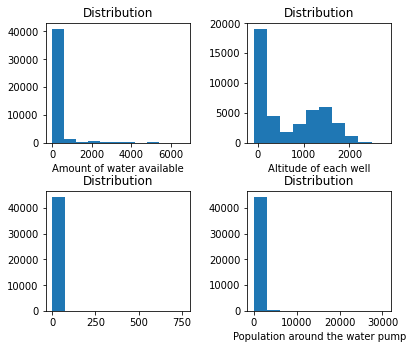

In [38]:
num_cols=['amount_tsh','gps_height','num_private','population']
plt.subplot(2,2,1)
hist(X_train['amount_tsh'],'Amount of water available','Distribution',np.arange(0,7000,600))
plt.subplot(2,2,2)
hist(X_train['gps_height'],'Altitude of each well','Distribution')
plt.subplot(2,2,3)
hist(X_train['num_private'],None,'Distribution')
plt.subplot(2,2,4)
hist(X_train['population'],'Population around the water pump','Distribution')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.1, 
                    wspace=0.4, 
                    hspace=0.4)

All 4 numerical variables are extremely right skewed.

In [39]:
for col in num_cols:
    sk=skew(X_train[col],bias=False)
    print("Skew for"+" "+col+" = "+str(sk))

Skew for amount_tsh = 62.22281339045965
Skew for gps_height = 0.460176685044095
Skew for num_private = 53.95285335544115
Skew for population = 13.213702018766114


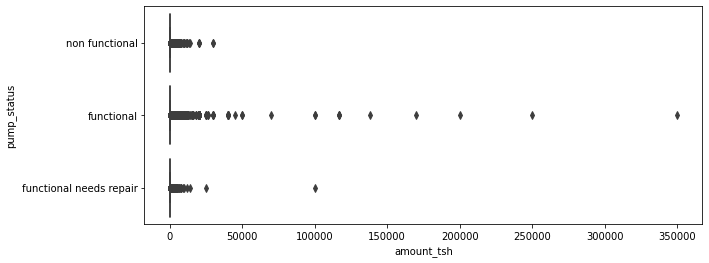

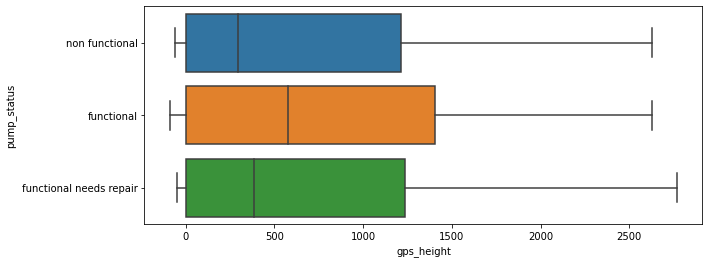

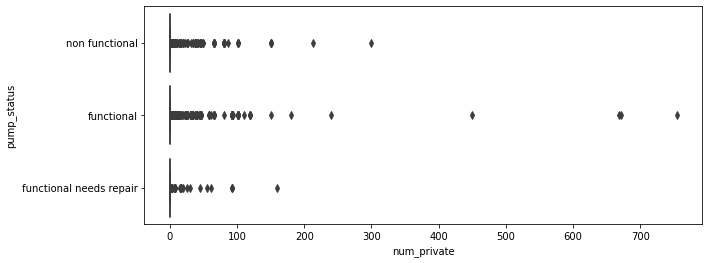

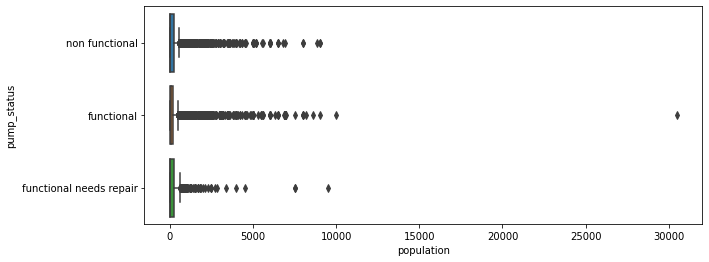

In [40]:
for col in num_cols:
    boxplot(col,X_train,X_train['pump_status'])

No significant relationship exists between the 4 numerical columns and the pump status. Moreover there are a lot of outliers that may hamper the classification models accuracy.Hence, we drop these 4 columns from the training dataset.

In [41]:
X_train.drop(num_cols,axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [42]:
X_holdout.drop(num_cols,axis=1,inplace=True)

In [43]:
X_holdout.drop(['longitude','latitude'],axis=1,inplace=True)

In [44]:
X_train.head()

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,region_code,district_code,lga,...,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,pump_status
id,,,,,,,,,,,,,,,,,,,,,
2112,2011-03-14,Amref,AMREF,Kwa Manyei,Rufiji,Mahingi,Pwani,6,2,Mkuranga,...,never pay,soft,good,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
49195,2013-03-21,0,0,Mlele,Wami / Ruvu,Mabwepande,Dar es Salaam,7,1,Kinondoni,...,never pay,soft,good,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,non functional
30131,2011-02-18,Arab Community,Arab community,Zunguni,Wami / Ruvu,Zunguni,Pwani,60,33,Kisarawe,...,never pay,soft,good,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
26428,2013-01-16,Wateraid,SEMA,Kibuli,Lake Tanganyika,Kibuli,Tabora,14,1,Nzega,...,on failure,soft,good,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
56870,2012-10-13,Dwe,DWE,Shuleni,Lake Tanganyika,Misheni Kati,Tabora,14,4,Urambo,...,never pay,soft,good,enough,dam,dam,surface,communal standpipe,communal standpipe,functional


In [45]:
data=[X_train,X_holdout,final_test_val]
for df in data:
    df.drop(['waterpoint_type_group'],axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [46]:
for df in data:
    df['management_group'].replace(to_replace=['unknown','parastatal'],value=['other','other'],inplace=True)    

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [47]:
for df in data:
    df['waterpoint_type'].replace(to_replace=['cattle trough','improved spring'],value=['unknown','unknown'],inplace=True)
X_train['waterpoint_type'].unique()

array(['hand pump', 'communal standpipe', 'other',
       'communal standpipe multiple', 'unknown', 'dam'], dtype=object)

In [48]:
for df in data:
    df['extraction_type_class'].replace(to_replace=['motorpump','other'],value=['other','other'],inplace=True)
X_train['extraction_type_class'].unique()

array(['handpump', 'submersible', 'other', 'gravity', 'rope pump',
       'wind-powered'], dtype=object)

In [49]:
for df in data:
     df['quality_group'].replace(to_replace=['milky'],value=['colored'],inplace=True) 
X_train['quality_group'].unique()        

array(['good', 'salty', 'colored', 'unknown', 'fluoride'], dtype=object)

In [50]:
for df in data:
    df['source_type'].replace(to_replace=['other','dam'],value=['other','other'],inplace=True)
X_train['source_type'].unique()    

array(['shallow well', 'borehole', 'other', 'river/lake',
       'rainwater harvesting', 'spring'], dtype=object)

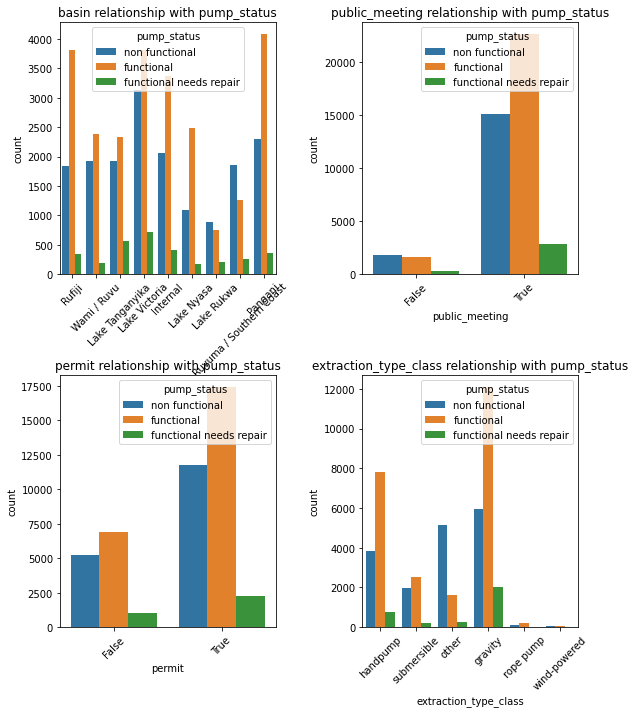

In [51]:
cat_cols=['basin','public_meeting','permit','extraction_type_class']
i=1
while i<=4:
    for col in cat_cols:
        plt.subplot(2,2,i)
        count(X_train,col,'pump_status',col,col+" relationship with pump_status")
        i=i+1
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.3, 
                    top=2.2, 
                    wspace=0.4, 
                    hspace=0.4)        

All 4 variables provide a decent insight into what pump is operational, non-functional and functional+needs repair. So we keep them as features.

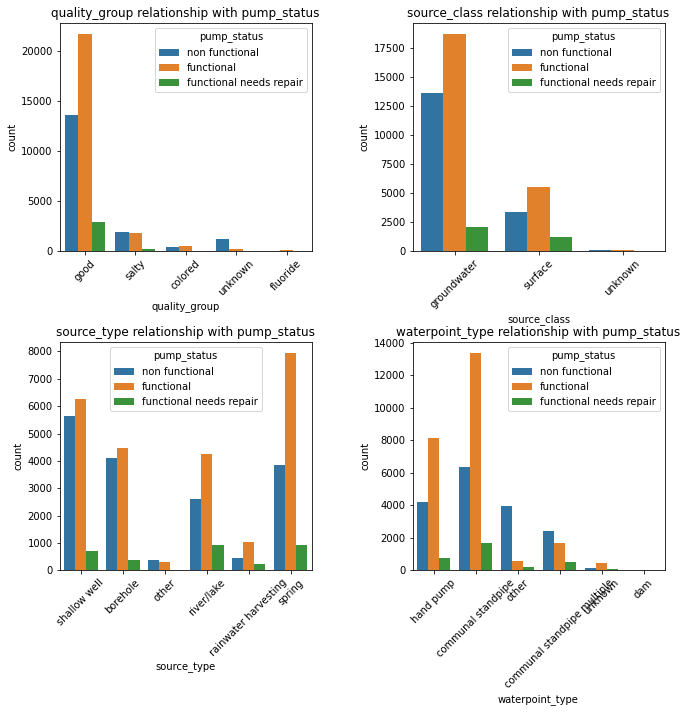

In [52]:
cat_cols1=['quality_group','source_class','source_type','waterpoint_type']
i=1
while i<=4:
    for col in cat_cols1:
        plt.subplot(2,2,i)
        count(X_train,col,'pump_status',col,col+" relationship with pump_status")
        i=i+1
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.5, 
                    top=2, 
                    wspace=0.4, 
                    hspace=0.4)      

Again, none of these columns can be excluded from the data.

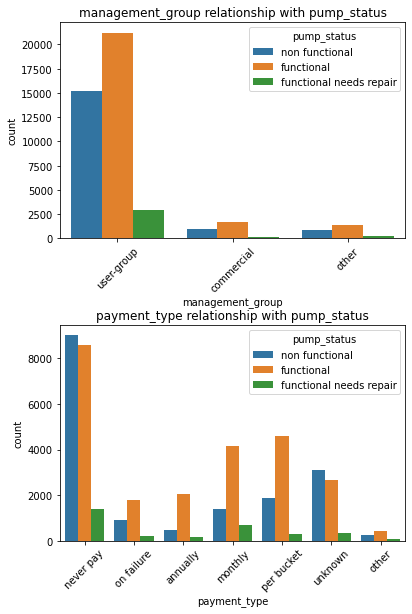

In [53]:
cat_cols2=['management_group','payment_type']
i=1
while i<=2:
    for col in cat_cols2:
        plt.subplot(2,1,i)
        count(X_train,col,'pump_status',col,col+" relationship with pump_status")
        i=i+1
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.9, 
                    wspace=0.4, 
                    hspace=0.4)      

In [54]:
X_train.head()

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,region_code,district_code,lga,...,management_group,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,pump_status
id,,,,,,,,,,,,,,,,,,,,,
2112,2011-03-14,Amref,AMREF,Kwa Manyei,Rufiji,Mahingi,Pwani,6,2,Mkuranga,...,user-group,never pay,soft,good,enough,shallow well,shallow well,groundwater,hand pump,non functional
49195,2013-03-21,0,0,Mlele,Wami / Ruvu,Mabwepande,Dar es Salaam,7,1,Kinondoni,...,commercial,never pay,soft,good,enough,machine dbh,borehole,groundwater,communal standpipe,non functional
30131,2011-02-18,Arab Community,Arab community,Zunguni,Wami / Ruvu,Zunguni,Pwani,60,33,Kisarawe,...,user-group,never pay,soft,good,enough,shallow well,shallow well,groundwater,hand pump,non functional
26428,2013-01-16,Wateraid,SEMA,Kibuli,Lake Tanganyika,Kibuli,Tabora,14,1,Nzega,...,user-group,on failure,soft,good,enough,machine dbh,borehole,groundwater,hand pump,functional
56870,2012-10-13,Dwe,DWE,Shuleni,Lake Tanganyika,Misheni Kati,Tabora,14,4,Urambo,...,user-group,never pay,soft,good,enough,dam,other,surface,communal standpipe,functional


In [55]:
for df in data:
    df['construction_year'].replace(to_replace=[0],value=['Decade 0'],inplace=True)
    df['construction_year'].replace(to_replace=[1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983],value=['Decade 1','Decade 1','Decade 1','Decade 1','Decade 1','Decade 1','Decade 1','Decade 1','Decade 1','Decade 1','Decade 1','Decade 1','Decade 1','Decade 1','Decade 1','Decade 1','Decade 1','Decade 1','Decade 1','Decade 1','Decade 1','Decade 1','Decade 1','Decade 1'],inplace=True)
    df['construction_year'].replace(to_replace=[1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999],value=['Decade 2','Decade 2','Decade 2','Decade 2','Decade 2','Decade 2','Decade 2','Decade 2','Decade 2','Decade 2','Decade 2','Decade 2','Decade 2','Decade 2','Decade 2','Decade 2'],inplace=True)
    df['construction_year'].replace(to_replace=[2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013],value=['Decade 3','Decade 3','Decade 3','Decade 3','Decade 3','Decade 3','Decade 3','Decade 3','Decade 3','Decade 3','Decade 3','Decade 3','Decade 3','Decade 3'],inplace=True)
df['construction_year'].unique()    

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


array(['Decade 3', 'Decade 2', 'Decade 1', 'Decade 0'], dtype=object)

I grouped the years in "construction_year" column into 4 different decades of atleast 15 years each. Following are the results

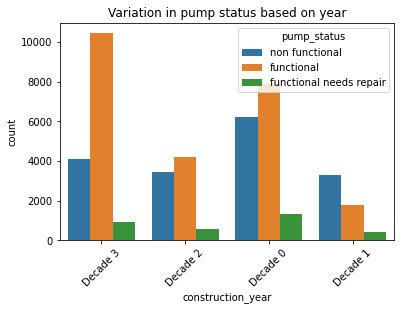

In [56]:
count(X_train,'construction_year','pump_status','pump_status','Variation in pump status based on year')

In [57]:
for df in data:
    df['date_recorded']=pd.to_datetime(df['date_recorded'])
    df['month']=df['date_recorded'].dt.month
    df['day']=df['date_recorded'].dt.day
    

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

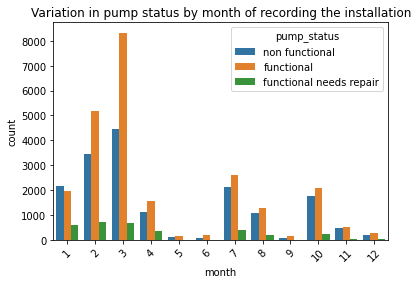

In [58]:
count(X_train,'month','pump_status','pump_status','Variation in pump status by month of recording the installation')

In [59]:
for df in data:
    df.drop(['day','date_recorded'],axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [60]:
X_train.columns

Index(['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'public_meeting',
       'scheme_management', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment_type', 'water_quality', 'quality_group',
       'quantity', 'source', 'source_type', 'source_class', 'waterpoint_type',
       'pump_status', 'month'],
      dtype='object')

In [61]:
for df in data:
    df.drop(['region'],axis=1,inplace=True)

In [62]:
X_train['region_code'].unique()

array([ 6,  7, 60, 14, 19, 11, 17, 16,  5, 10, 15,  3,  1, 12, 13, 80, 21,
        2, 20, 18,  4, 90,  9,  8, 99, 24, 40])

**APPLYING CLASSIFICATION ALGORITHMS**

In [63]:
X_train.drop(['pump_status'],axis=1,inplace=True)


In [64]:
X_holdout.columns

Index(['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region_code',
       'district_code', 'lga', 'ward', 'public_meeting', 'scheme_management',
       'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment_type', 'water_quality', 'quality_group',
       'quantity', 'source', 'source_type', 'source_class', 'waterpoint_type',
       'month'],
      dtype='object')

In [65]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
cat_list=['funder', 'installer', 'wpt_name', 'basin', 'subvillage',
       'region_code', 'district_code', 'lga', 'ward', 'public_meeting',
       'scheme_management', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment_type', 'water_quality', 'quality_group',
       'quantity', 'source', 'source_type', 'source_class', 'waterpoint_type',
        'month']
for df in data:
    for col in cat_list:
        df[col]=label.fit_transform(df[col])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [66]:
final_test_val.columns

Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name',
       'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'month'],
      dtype='object')

In [67]:
final_test_val.drop(['amount_tsh','gps_height','longitude','latitude','num_private','population','recorded_by','payment','quantity_group','scheme_name'],axis=1,inplace=True)

In [68]:
len(X_holdout.columns)==len(final_test_val.columns)

True

In [69]:
X_train.columns

Index(['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region_code',
       'district_code', 'lga', 'ward', 'public_meeting', 'scheme_management',
       'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment_type', 'water_quality', 'quality_group',
       'quantity', 'source', 'source_type', 'source_class', 'waterpoint_type',
       'month'],
      dtype='object')

In [70]:
X_train_1=X_train.copy()
X_holdout_1=X_holdout.copy()
data1=[X_train_1,X_holdout_1]

In [71]:
X_train_2=X_train.copy()
X_holdout_2=X_holdout.copy()
data2=[X_train_2,X_holdout_2,final_test_val]

In [72]:
X_train_1['management_group'].value_counts()  

2    39350
0     2726
1     2474
Name: management_group, dtype: int64

In [73]:
final_test_val.columns

Index(['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region_code',
       'district_code', 'lga', 'ward', 'public_meeting', 'scheme_management',
       'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment_type', 'water_quality', 'quality_group',
       'quantity', 'source', 'source_type', 'source_class', 'waterpoint_type',
       'month'],
      dtype='object')

In [74]:
X_train['payment_type'].unique()

array([2, 3, 0, 1, 5, 6, 4])

1) DECISION TREE CLASSIFIER

In [75]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(criterion="entropy",max_depth=11,random_state=17,max_features=23)
dec_tree.fit(X_train_1,y_train)
result=dec_tree.predict(X_holdout_1)
print(f"Accuracy of the classifier is: {accuracy_score(y_holdout,result)}")

#final_result=dec_tree.predict(final_test_val)

Accuracy of the classifier is: 0.730976430976431


In [76]:
#submission=pd.Series(final_result,index=final_test_val.index)

In [77]:
#submission.head()

In [78]:
#submission.to_csv('submission_4.csv',index=True)

2) RANDOM FOREST CLASSIFIER

In [79]:
from sklearn.ensemble import RandomForestClassifier
random_for=RandomForestClassifier(n_estimators=96,max_features=6,max_depth=21,random_state=15)
random_for.fit(X_train,y_train)
result_1=random_for.predict(X_holdout)
print(f"Accuracy of the classifier is: {accuracy_score(y_holdout,result_1)}")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy of the classifier is: 0.7828956228956229


So far, Random Forest has given the best test accuracy, which was 78.38%.

In [80]:
#final_result_6=random_for.predict(final_test_val)
#submission_6=pd.Series(final_result_6,index=final_test_val.index)

In [81]:
#submission_6.to_csv('/kaggle/working/submission_6.csv',index=True)

3) XGBoost Classifier

In [82]:
#from xgboost import XGBClassifier
#from sklearn.model_selection import cross_val_score, KFold

In [83]:
#xgbc=XGBClassifier(random_state=5,n_estimators=95,max_depth=7)
#xgbc.fit(X_train,y_train)
#result_3=xgbc.predict(X_holdout)
#print(f"Accuracy of the classifier is: {accuracy_score(y_holdout,result_3)}"+" "+str(i))

In [84]:
#final_result_7=random_for.predict(final_test_val)
#submission_7=pd.Series(final_result_7,index=final_test_val.index)